In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import iventure.utils_plot

In [4]:
prng = np.random.RandomState(10)

#### Prepare the population schema.

In [5]:
varnames = [
    'Country_of_Operator',
    'Operator_Owner',
    'Users',
    'Purpose',
    'Class_of_Orbit',
    'Type_of_Orbit',
    'Perigee_km',
    'Apogee_km',
    'Eccentricity',
    'Period_minutes',
    'Launch_Mass_kg',
    'Dry_Mass_kg',
    'Power_watts',
    'Date_of_Launch',
    'Anticipated_Lifetime',
    'Contractor',
    'Country_of_Contractor',
    'Launch_Site',
    'Launch_Vehicle',
    'Source_Used_for_Orbital_Data',
    'longitude_radians_of_geo',
    'Inclination_radians',
]

In [6]:
schema = [
    ('categorical', {'k': 79}),  # 0 Country_of_Operator
    ('categorical', {'k': 346}), # 1 Operator_Owner
    ('categorical', {'k': 18}),  # 2 Users
    ('categorical', {'k': 46}),  # 3 Purpose
    ('categorical', {'k': 4}),   # 4 Class_of_Orbit
    ('categorical', {'k': 7}),   # 5 Type_of_Orbit
    ('normal', None),            # 6 Perigee_km
    ('normal', None),            # 7 Apogee_km
    ('normal', None),            # 8 Eccentricity
    ('normal', None),            # 9 Period_minutes
    ('normal', None),            # 10 Launch_Mass_kg
    ('normal', None),            # 11 Dry_Mass_kg
    ('normal', None),            # 12 Power_watts
    ('normal', None),            # 13 Date_of_Launch
    ('normal', None),            # 14 Anticipated_Lifetime
    ('categorical', {'k': 282}), # 15 Contractor
    ('categorical', {'k': 54}),  # 16 Country_of_Contractor
    ('categorical', {'k': 25}),  # 17 Launch_Site
    ('categorical', {'k': 141}), # 18 Launch_Vehicle
    ('categorical', {'k': 38}),  # 19 Source_Used_for_Orbital_Data
    ('normal', None),            # 20 longitude_radians_of_geo
    ('normal', None),            # 21 Inclination_radians
]

In [7]:
from cgpm2.crosscat_ensemble import CrossCatEnsemble

In [8]:
crosscat = CrossCatEnsemble(range(len(schema)), [], schema, 50, rng=prng)

In [9]:
df = pd.read_csv('../resources/satellites.coded.csv', index_col=False)

In [10]:
rowids = range(len(df))
observations = [dict(zip(range(len(row)), row.values)) for _i, row in df.iterrows()]
crosscat.observe_bulk(rowids, observations)

In [11]:
inference = crosscat.make_default_inference_program(N=250)

In [12]:
crosscat.transition(inference)

Completed: 250 iterations in 151.599109 seconds.
Completed: 250 iterations in 153.098340 seconds.
Completed: 250 iterations in 153.470231 seconds.
Completed: 250 iterations in 157.689651 seconds.
Completed: 250 iterations in 160.138097 seconds.
Completed: 250 iterations in 160.413004 seconds.
Completed: 250 iterations in 161.542536 seconds.
Completed: 250 iterations in 161.688903 seconds.
Completed: 250 iterations in 162.646880 seconds.
Completed: 250 iterations in 162.451415 seconds.
Completed: 250 iterations in 162.905966 seconds.
Completed: 250 iterations in 163.412426 seconds.
Completed: 250 iterations in 163.541996 seconds.
Completed: 250 iterations in 164.244298 seconds.
Completed: 250 iterations in 165.891034 seconds.
Completed: 250 iterations in 165.855015 seconds.
Completed: 250 iterations in 165.496253 seconds.
Completed: 250 iterations in 165.718414 seconds.
Completed: 250 iterations in 166.333363 seconds.
Completed: 250 iterations in 166.358691 seconds.
Completed: 250 itera

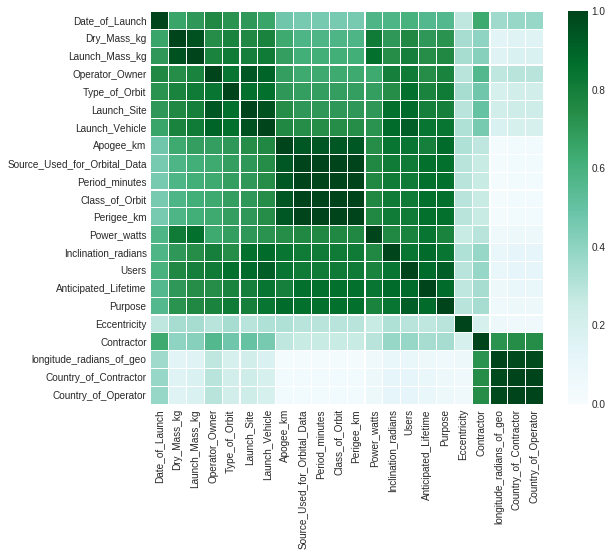

In [13]:
D = crosscat.get_same_assignment_column_pairwise()
dependence = iventure.utils_plot.tidy_pairwise(np.mean(D, axis=0), index=varnames, columns=varnames)
iventure.utils_plot.heatmap(dependence)

In [14]:
crosscat.transition(inference)

Completed: 250 iterations in 156.170170 seconds.
Completed: 250 iterations in 157.948042 seconds.
Completed: 250 iterations in 160.049225 seconds.
Completed: 250 iterations in 160.672607 seconds.
Completed: 250 iterations in 165.956479 seconds.
Completed: 250 iterations in 167.274529 seconds.
Completed: 250 iterations in 167.251619 seconds.
Completed: 250 iterations in 167.265137 seconds.
Completed: 250 iterations in 167.476885 seconds.
Completed: 250 iterations in 167.883571 seconds.
Completed: 250 iterations in 168.674454 seconds.
Completed: 250 iterations in 168.928798 seconds.
Completed: 250 iterations in 169.341921 seconds.
Completed: 250 iterations in 169.139279 seconds.
Completed: 250 iterations in 169.787492 seconds.
Completed: 250 iterations in 171.022933 seconds.
Completed: 250 iterations in 171.045175 seconds.
Completed: 250 iterations in 171.339417 seconds.
Completed: 250 iterations in 172.225892 seconds.
Completed: 250 iterations in 172.977954 seconds.
Completed: 250 itera

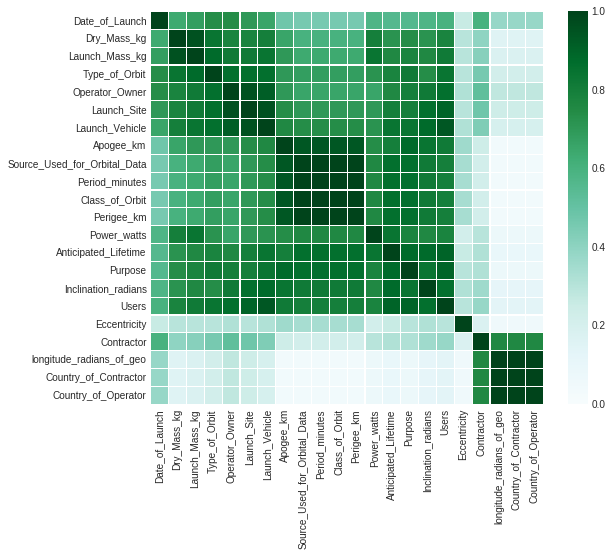

In [15]:
D = crosscat.get_same_assignment_column_pairwise()
dependence = iventure.utils_plot.tidy_pairwise(np.mean(D, axis=0), index=varnames, columns=varnames)
iventure.utils_plot.heatmap(dependence)